In [1]:
import pandas as pd

In [2]:
from nsepy import get_history as gh
import datetime as dt

In [3]:
import yfinance as yf

start = dt.datetime(2021, 7, 1)    #July 1, 2021, to January 27, 2022.
end = dt.datetime(2022, 1, 27)
symbol='AXISBANK.NS'
stk_data = yf.download(symbol, start=start, end=end)
stk_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,743.209534,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,747.391296,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,757.049072,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,755.057800,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,759.588074,3573368
...,...,...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976,726.432556,7746270
2022-01-20,731.049988,737.150024,722.150024,728.900024,725.735718,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,709.406860,10689060


In [4]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [5]:
column="Close"

In [6]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [7]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (143, 1)


In [8]:
orders=[(1,0,2),(1,0,1),(2,0,1),(1,0,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1) #0--> starting index or date for the prediction range.0 is used, which represents the beginning dataset
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE-Testset: 0.05879880752800061
maPe-Testset: 1573993055241.1448
RMSE-Testset: 0.05884113976810106
maPe-Testset: 1634150471723.494
RMSE-Testset: 0.05882513123171778
maPe-Testset: 1610723280292.7126
RMSE-Testset: 0.05884113976810106
maPe-Testset: 1634150471723.494


C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


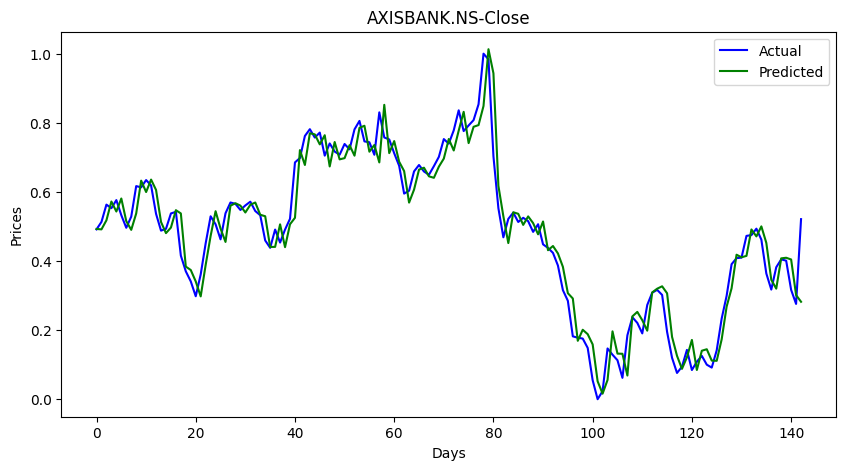

In [10]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","AXISBANK.NS-Close","Days","Prices")
#prices-->minmax VALU SO IN POINT VALUES IN GRAPH

In [11]:
len(data1)

143

#### data1,y_pred inverse transform get original values graph

In [12]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [13]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

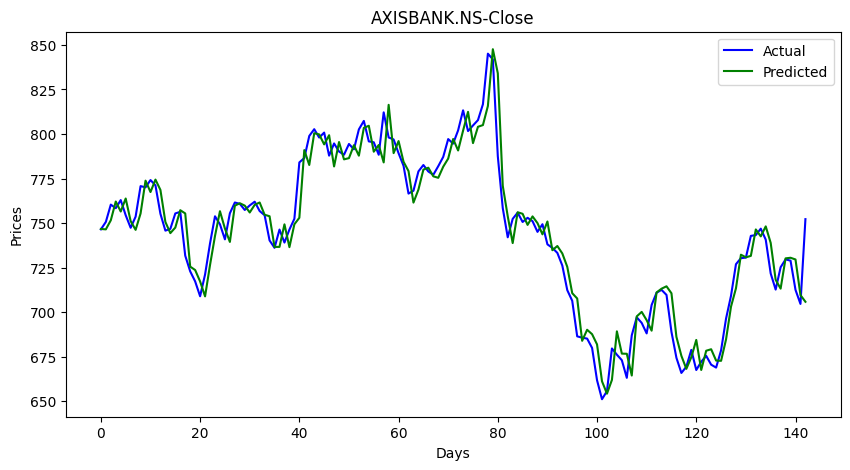

In [15]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","AXISBANK.NS-Close","Days","Prices")

In [16]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 11.415181115011604
maPe-Testset: 0.011370225086147644


C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### AI FORECAST FOR NEXT 3 DAYS

In [17]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [18]:
forecast

array([0.59101123, 0.584706  , 0.57880527, 0.57328309])

In [19]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [22]:
forecast_stock_price_test_oriF

,Closefore
0,765.756155
1,764.53294
2,763.388198
3,762.316894


In [21]:
forecast_stock_price_test_oriF.to_csv("ClosetsAXISBANK-ARMA.csv",index=False)